In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

custom = sns.xkcd_palette(colors= ['sage green', 'coral', 'bluegrey', 'charcoal'])
alt_custom = sns.xkcd_palette(colors=['charcoal', 'sage green'])
coolwarm = sns.xkcd_palette(colors=['charcoal', 'coral'])

sns.set_style("dark")

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target,age_group,hrMax_bins,hrMax_high,STdep_bins
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,60's,140-159,0,2
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,30's,180-202,1,4
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,40's,160-179,0,1
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,50's,160-179,1,1
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,50's,160-179,0,1


In [4]:
y = data.target.values
x_data = data.drop(['target', 'age_group', 'hrMax_bins', 'STdep_bins'], axis=1)

In [5]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [15]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [16]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [17]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [18]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [19]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [20]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [23]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3954794515067495


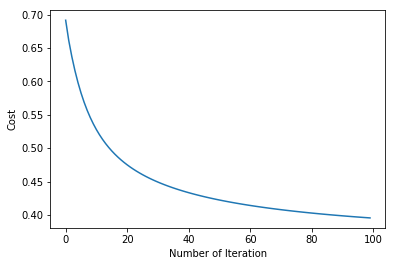

Test Accuracy: 83.33%


In [24]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [25]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.33%


C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.33%


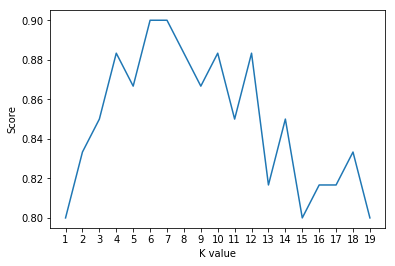

Maximum KNN Score is 90.00%


In [27]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [29]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(6, knn.score(x_test.T, y_test.T)*100))

6 NN Score: 90.00%


In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.33%


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 76.67%


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 83.33%


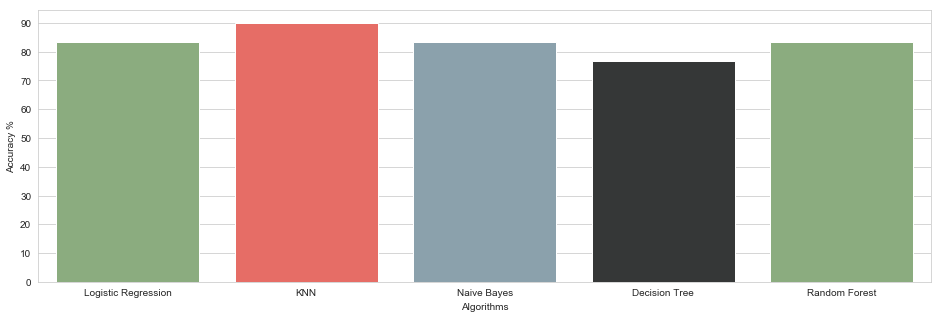

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=custom)
plt.show()